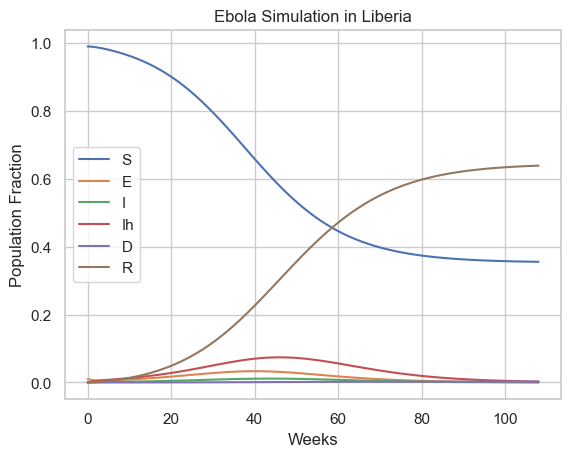

           death     deaths
0       0.000000   0.000000
1      17.216326  17.216326
2      35.659168  18.442842
3      55.984897  20.325729
4      78.537141  22.552244
..           ...        ...
103  9494.605668   7.841233
104  9501.841839   7.236171
105  9508.515910   6.674071
106  9514.668272   6.152362
107  9520.336448   5.668176

[108 rows x 2 columns]
Total cases during 108 weeks: 2580622.8787870067
Total deaths during 108 weeks: 9520.336447937527


In [128]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.integrate import odeint
# Parameters
mu = 0.000044766
#chi = 0.370
sigma = 0.0877
lambda_val = 0.333
omega = 0.17
xi = 0.00041073
gamma_val = 0.05
alpha = 0.2
beta_I = 1.92
# Define the system of differential equations
# Define the Model with the system of differential equations
def model(y, t):
    S, E, In, Ih, D, R = y
    
    dSdt = -In*S*beta_I - S*mu + mu
    dEdt = In*S*beta_I - E*lambda_val - E*mu - E*sigma - E*xi
    dIndt = E*sigma - In*alpha - In*gamma_val - In*mu - In*xi
    dIhdt = E*lambda_val + In*alpha - mu*Ih - omega*Ih - xi*Ih
    dDdt = E*xi + In*xi + xi*Ih - mu*D
    dRdt = In*gamma_val - R*mu + omega*Ih
    
    return [dSdt, dEdt, dIndt, dIhdt, dDdt, dRdt]

# Initial conditions
S0 = 0.99
E0 = 0.01
In0 = 0.0
Ih0 = 0.0
D0 = 0.0
R0 = 0.0
cases_list = []
deaths_list = []

# Time points (weekly for 108 weeks)
t = np.linspace(0, 108, 108)  

# Initial state
y0 = [S0, E0, In0, Ih0, D0, R0]

# Integrate the system of differential equations
solution = odeint(model, y0, t)

# Extracting results
S, E, In, Ih, D, R = solution.T

# Calculate cases and deaths at each time step
for i in range(len(t)):
    cases = In[i] * S[i] * beta_I
    death = D[i]
    cases_list.append(cases)
    deaths_list.append(death)

# Plotting the results
plt.plot(t, S, label='S')
plt.plot(t, E, label='E')
plt.plot(t, In, label='I')
plt.plot(t, Ih, label='Ih')
plt.plot(t, D, label='D')
plt.plot(t, R, label='R')
plt.xlabel('Weeks')
plt.ylabel('Population Fraction')
plt.title('Ebola Simulation in Liberia')
plt.legend()
plt.show()

# Create DataFrames for cases and deaths
df_cases = pd.DataFrame({'cases': cases_list})
df_deaths = pd.DataFrame({'death': deaths_list})

# Multiply by the total population to get absolute numbers
total_population = 4092310
df_cases['cases'] *= total_population
df_deaths['death'] *= total_population
df_deaths['deaths']=df_deaths['death'] - df_deaths['death'].shift(1)
df_deaths['deaths'].fillna(df_deaths['death'], inplace=True)
print(df_deaths)
print("Total cases during 108 weeks:",sum(df_cases['cases']))
print("Total deaths during 108 weeks:",sum(df_deaths['deaths']))

In [129]:
df = pd.read_excel(r"C:\Users\sobin\Downloads\archive\CDC_EBOLA.xlsx")
df

,Week,Cases in Guinea,Deaths in Guinea,Cases in Liberia,Deaths in Liberia,Cases in Sierra Leone,Deaths in Sierra Leone
0,2014-12,103,66,8,6,6,5
1,2014-13,24,17,0,0,0,0
2,2014-14,30,18,14,8,0,0
3,2014-15,40,21,5,0,0,0
4,2014-16,11,14,7,0,0,0
...,...,...,...,...,...,...,...
103,2016-11,0,0,0,0,0,0
104,2016-12,0,4,0,0,0,0
105,2016-13,1,3,0,0,0,0
106,2016-14,0,0,0,0,0,0


In [130]:
df_LE=df[['Week','Cases in Liberia','Deaths in Liberia']]
df_LE['Model_Cases'] = df_cases['cases']
df_LE['Model_Deaths'] = df_deaths['deaths']
df_LE

C:\Users\sobin\AppData\Local\Temp\ipykernel_22100\3377730798.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_LE['Model_Cases'] = df_cases['cases']
C:\Users\sobin\AppData\Local\Temp\ipykernel_22100\3377730798.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_LE['Model_Deaths'] = df_deaths['deaths']


,Week,Cases in Liberia,Deaths in Liberia,Model_Cases,Model_Deaths
0,2014-12,8,6,0.000000,0.000000
1,2014-13,0,0,5048.857935,17.216326
2,2014-14,14,8,7828.521172,18.442842
3,2014-15,5,0,9576.856791,20.325729
4,2014-16,7,0,10875.572827,22.552244
...,...,...,...,...,...
103,2016-11,0,0,1095.262558,7.841233
104,2016-12,0,0,1013.414129,7.236171
105,2016-13,0,0,937.652473,6.674071
106,2016-14,0,0,867.529366,6.152362


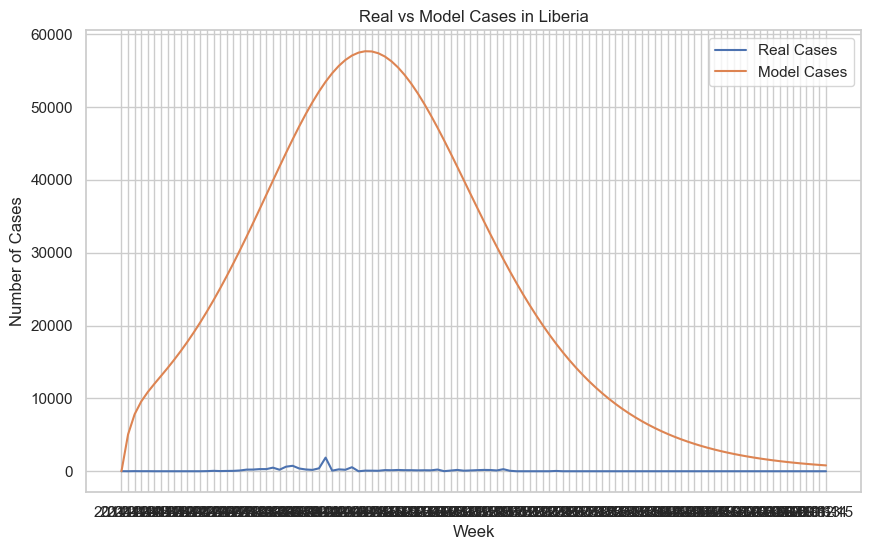

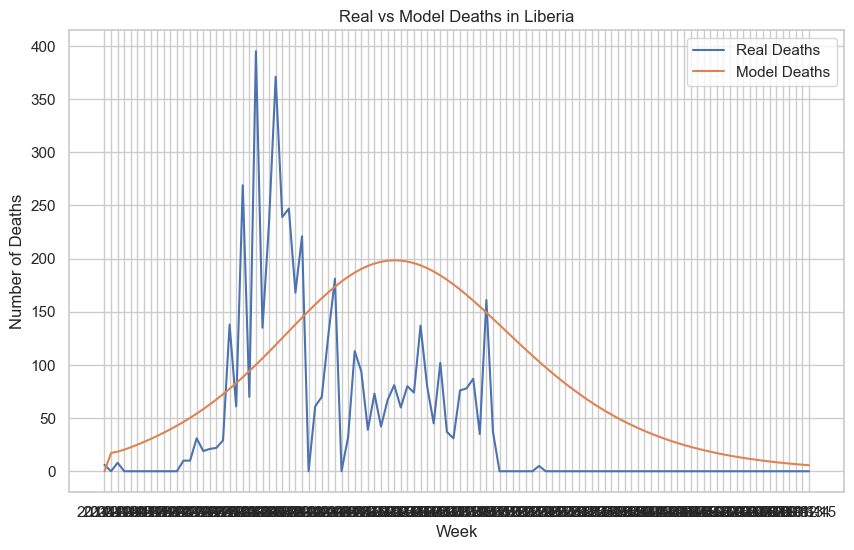

In [131]:
import seaborn as sns
# Set the style of seaborn
sns.set(style="whitegrid")

# Plotting cases
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_LE, x='Week', y='Cases in Liberia', label='Real Cases')
sns.lineplot(data=df_LE, x='Week', y='Model_Cases', label='Model Cases')
plt.xlabel('Week')
plt.ylabel('Number of Cases')
plt.title('Real vs Model Cases in Liberia')
plt.legend()
plt.show()

# Plotting deaths
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_LE, x='Week', y='Deaths in Liberia', label='Real Deaths')
sns.lineplot(data=df_LE, x='Week', y='Model_Deaths', label='Model Deaths')
plt.xlabel('Week')
plt.ylabel('Number of Deaths')
plt.title('Real vs Model Deaths in Liberia')
plt.legend()
plt.show()


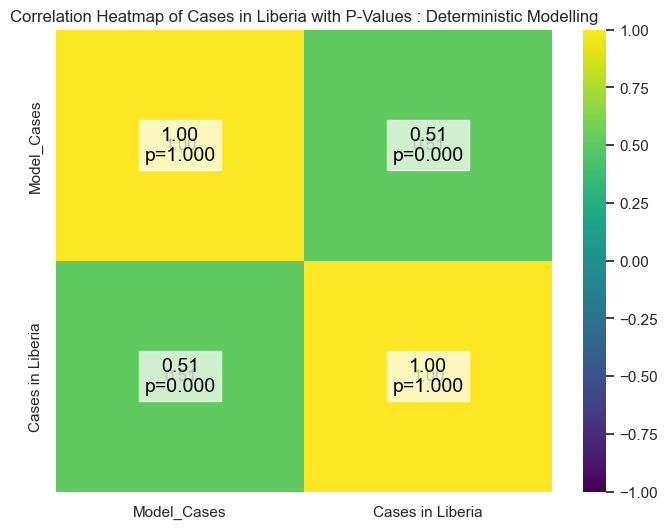

In [132]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
# Calculate the correlation matrix and p-values
correlation_matrix = df_LE[['Model_Cases', 'Cases in Liberia']].corr()
p_values = df_LE[['Model_Cases', 'Cases in Liberia']].corr(method=lambda x, y: pearsonr(x, y)[1])

# Plot the heatmap
plt.figure(figsize=(8, 6))
ax = sns.heatmap(correlation_matrix, annot=True, cmap="viridis", vmin=-1, vmax=1, fmt=".2f")

# Add p-values as text annotations within heatmap cells
for i in range(correlation_matrix.shape[0]):
    for j in range(correlation_matrix.shape[1]):
        p_val = f"p={p_values.iloc[i, j]:.3f}"
        ax.text(j + 0.5, i + 0.5, f"{correlation_matrix.iloc[i, j]:.2f}\n{p_val}", 
                ha='center', va='center', color='black', fontsize=14, bbox=dict(facecolor='white', alpha=0.7))

# Customize the plot
plt.title("Correlation Heatmap of Cases in Liberia with P-Values : Deterministic Modelling")
plt.show()

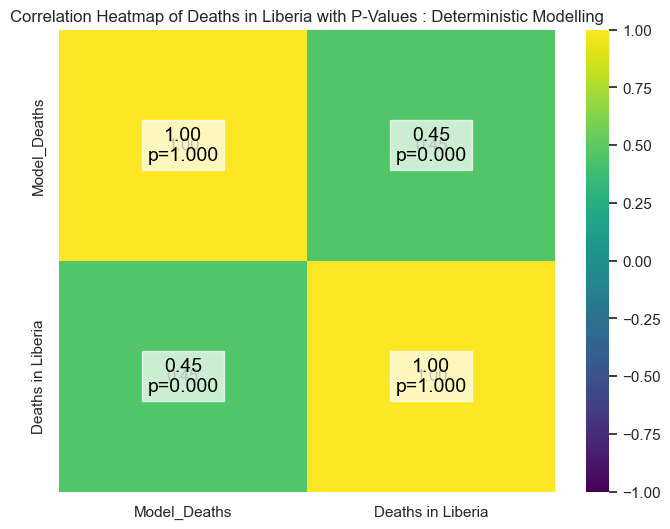

In [133]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix and p-values
correlation_matrix = df_LE[['Model_Deaths', 'Deaths in Liberia']].corr()
p_values = df_LE[['Model_Deaths', 'Deaths in Liberia']].corr(method=lambda x, y: pearsonr(x, y)[1])

# Plot the heatmap
plt.figure(figsize=(8, 6))
ax = sns.heatmap(correlation_matrix, annot=True, cmap="viridis", vmin=-1, vmax=1, fmt=".2f")

# Add p-values as text annotations within heatmap cells
for i in range(correlation_matrix.shape[0]):
    for j in range(correlation_matrix.shape[1]):
        p_val = f"p={p_values.iloc[i, j]:.3f}"
        ax.text(j + 0.5, i + 0.5, f"{correlation_matrix.iloc[i, j]:.2f}\n{p_val}", 
                ha='center', va='center', color='black', fontsize=14, bbox=dict(facecolor='white', alpha=0.7))

# Customize the plot
plt.title("Correlation Heatmap of Deaths in Liberia with P-Values : Deterministic Modelling")
plt.show()

In [134]:
import numpy as np
import matplotlib.pyplot as plt

# Assign transition probabilities for each element in the matrix
p_SS = 0.99995177282
p_SE = 0.00000346048
p_SI = 0.0
p_S_Ih = 0.0
p_SD = 0.0
p_SR = 0.0
p_SW = 0.0000447667

p_ES = 0.0
p_EE = 0.5829549549583569
p_EI = 0.087
p_E_Ih = 0.33
p_ED = 0.0000002749431
p_ER = 0.0
p_EW = 0.0000447667

p_IS = 0.0
p_IE = 0.0
p_II = 0.7499549583569
p_I_Ih = 0.2
p_ID = 0.0000002749431
p_IR = 0.05
p_IW = 0.0000447667


p_IhS = 0.0
p_IhE = 0.0
p_IhI = 0.0
p_Ih_Ih = 0.8299549583569
p_IhD = 0.0000002749431
p_IhR =  0.17
p_IhW = 0.0000447667


p_DS = 0.0
p_DE = 0.0
p_DI = 0.0
p_D_Ih = 0.0
p_DD = 1
p_DR = 0.0
p_DW = 0.0


p_RS = 0.0
p_RE = 0.0
p_RI = 0.0
p_R_Ih = 0.0
p_RD = 0.0
p_RR = 0.9999552333
p_RW = 0.0000447667

p_WS = 1
p_WE = 0.0
p_WI = 0.0
p_W_Ih = 0.0
p_WD = 0.0
p_WR = 0.0
p_WW = 0.0



P = np.array([
    [p_SS, p_SE, p_SI, p_S_Ih, p_SD, p_SR, p_SW],
    [p_ES, p_EE, p_EI, p_E_Ih, p_ED, p_ER, p_EW],
    [p_IS, p_IE, p_II, p_I_Ih, p_ID, p_IR, p_IW],
    [p_IhS, p_IhE, p_IhI, p_Ih_Ih, p_IhD, p_IhR, p_IhW],
    [p_DS, p_DE, p_DI, p_D_Ih, p_DD, p_DR, p_DW],
    [p_RS, p_RE, p_RI, p_R_Ih, p_RD, p_RR, p_RW],
    [p_WS, p_WE, p_WI, p_W_Ih, p_WD, p_WR, p_WW],
])
print("Transition Matrix(P):",P)
P_756= np.linalg.matrix_power(P,756)
print("Transition Matrix(P_756):",P_756)
# Initial state distribution
initial_susceptible_population = 4092310
print("Total Cases in during 108 week:",0.00256895170554371*initial_susceptible_population)
print("Total Deaths in  during 108 weeks:",0.00000644789368*initial_susceptible_population)

Transition Matrix(P): [[9.99951773e-01 3.46048000e-06 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 4.47667000e-05]
 [0.00000000e+00 5.82954955e-01 8.70000000e-02 3.30000000e-01
  2.74943100e-07 0.00000000e+00 4.47667000e-05]
 [0.00000000e+00 0.00000000e+00 7.49954958e-01 2.00000000e-01
  2.74943100e-07 5.00000000e-02 4.47667000e-05]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 8.29954958e-01
  2.74943100e-07 1.70000000e-01 4.47667000e-05]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  1.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 9.99955233e-01 4.47667000e-05]
 [1.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00]]
Transition Matrix(P_756): [[9.97386284e-01 8.27599564e-06 2.87956622e-06 1.94481230e-05
  6.31068371e-09 2.53834171e-03 4.47646957e-05]
 [3.31901471e-02 2.74540226e-07 9.50242590e-08 6.39601891e-07
  2.43795

In [135]:
deaths_st = []
cases_st = []
# Iterate over the range of values for n (1 to 180)
for n in range(1, 109):
    # Generate the transition matrix for the current n
    P_d = np.linalg.matrix_power(P, n*7)
    cases_sum= P_d[0, 1] + P_d[0, 2]+P_d[0, 3]+P_d[0, 4]+P_d[0, 5]
    deaths_sum = P_d[1, 4] + P_d[2, 4]+P_d[3, 4]
    
    # Store the sum in the second global list
    deaths_st.append(deaths_sum)
    cases_st.append(cases_sum)

In [136]:
total_population = 4092310
# Create DataFrames for cases and deaths
df_st_cases = pd.DataFrame({'case':cases_st})
df_st_deaths = pd.DataFrame({'death':deaths_st})
df_st_deaths['death'] *= total_population
df_st_cases['case'] *= total_population
df_st_cases['cases']=df_st_cases['case']-df_st_cases['case'].shift(1)
df_st_cases['cases'].fillna(df_st_cases['case'], inplace=True)
df_st_deaths['deaths']=df_st_deaths['death'] - df_st_deaths['death'].shift(1)
df_st_deaths['deaths'].fillna(df_st_deaths['death'], inplace=True)
df_st_cases
print(sum(df_st_cases['cases']))

10512.946769592238


In [137]:
df_LE['ST_Model_Cases'] = df_st_cases['cases'] 
df_LE['ST_Model_Deaths'] = df_st_deaths['deaths']
df_LE

C:\Users\sobin\AppData\Local\Temp\ipykernel_22100\4259099142.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_LE['ST_Model_Cases'] = df_st_cases['cases']


,Week,Cases in Liberia,Deaths in Liberia,Model_Cases,Model_Deaths,ST_Model_Cases,ST_Model_Deaths
0,2014-12,8,6,0.000000,0.000000,99.111354,17.521673
1,2014-13,0,0,5048.857935,17.216326,99.077266,6.263981
2,2014-14,14,8,7828.521172,18.442842,99.043823,1.869275
3,2014-15,5,0,9576.856791,20.325729,99.010392,0.529034
4,2014-16,7,0,10875.572827,22.552244,98.976972,0.146421
...,...,...,...,...,...,...,...
103,2016-11,0,0,1095.262558,7.841233,95.723617,0.000023
104,2016-12,0,0,1013.414129,7.236171,95.691306,0.000023
105,2016-13,0,0,937.652473,6.674071,95.659006,0.000023
106,2016-14,0,0,867.529366,6.152362,95.626718,0.000024


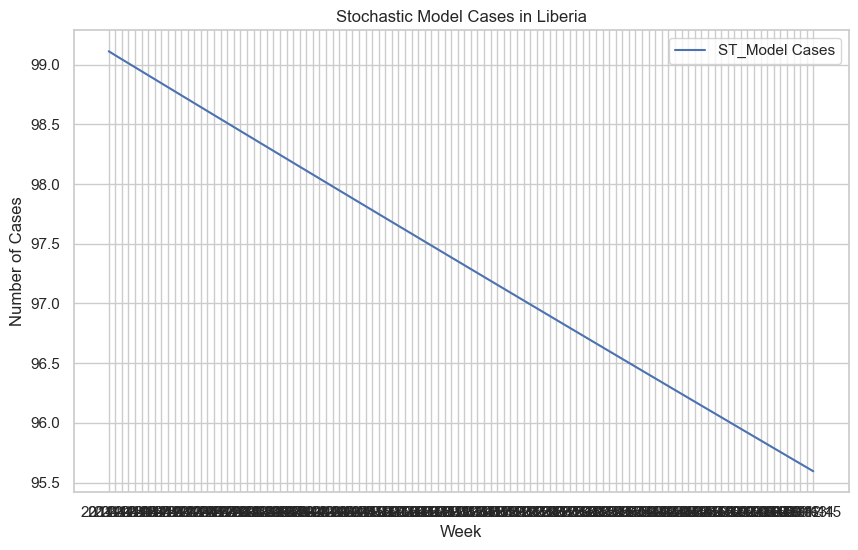

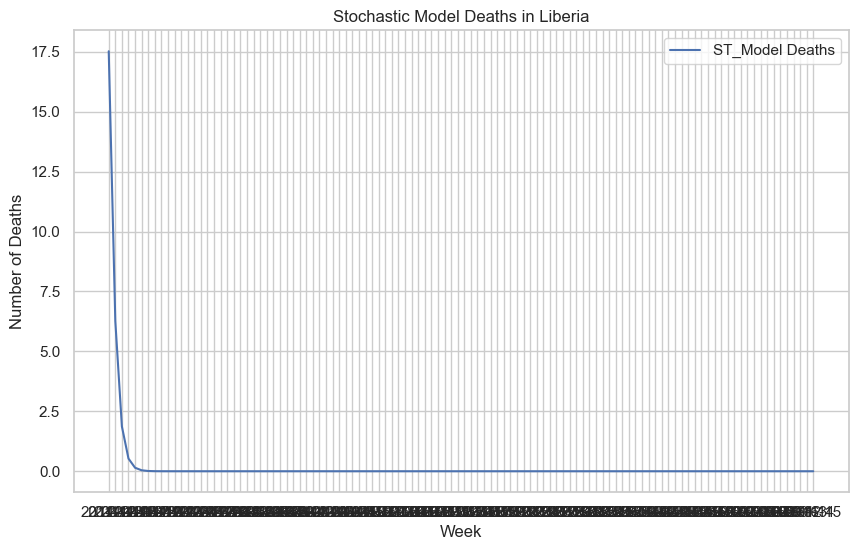

In [138]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style of seaborn
sns.set(style="whitegrid")

# Plotting cases
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_LE, x='Week', y='ST_Model_Cases', label='ST_Model Cases')
plt.xlabel('Week')
plt.ylabel('Number of Cases')
plt.title('Stochastic Model Cases in Liberia')
plt.legend()
plt.show()

# Plotting deaths
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_LE, x='Week', y='ST_Model_Deaths', label='ST_Model Deaths')
plt.xlabel('Week')
plt.ylabel('Number of Deaths')
plt.title('Stochastic Model Deaths in Liberia')
plt.legend()
plt.show()

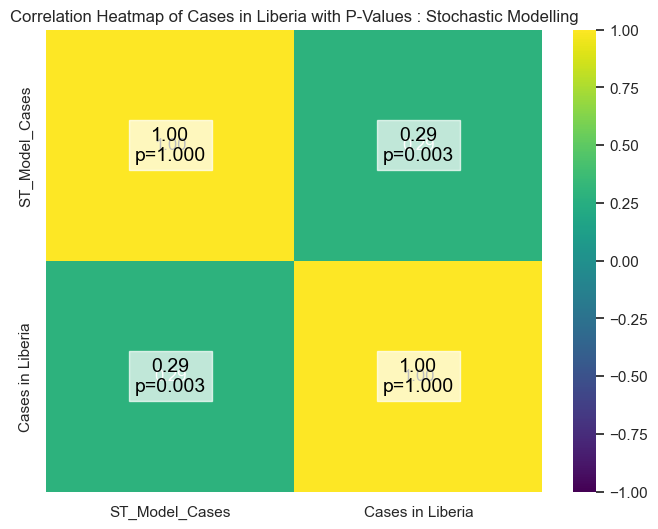

In [139]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
# Calculate the correlation matrix and p-values
correlation_matrix = df_LE[['ST_Model_Cases', 'Cases in Liberia']].corr()
p_values = df_LE[['ST_Model_Cases', 'Cases in Liberia']].corr(method=lambda x, y: pearsonr(x, y)[1])

# Plot the heatmap
plt.figure(figsize=(8, 6))
ax = sns.heatmap(correlation_matrix, annot=True, cmap="viridis", vmin=-1, vmax=1, fmt=".2f")

# Add p-values as text annotations within heatmap cells
for i in range(correlation_matrix.shape[0]):
    for j in range(correlation_matrix.shape[1]):
        p_val = f"p={p_values.iloc[i, j]:.3f}"
        ax.text(j + 0.5, i + 0.5, f"{correlation_matrix.iloc[i, j]:.2f}\n{p_val}", 
                ha='center', va='center', color='black', fontsize=14, bbox=dict(facecolor='white', alpha=0.7))

# Customize the plot
plt.title("Correlation Heatmap of Cases in Liberia with P-Values : Stochastic Modelling")
plt.show()

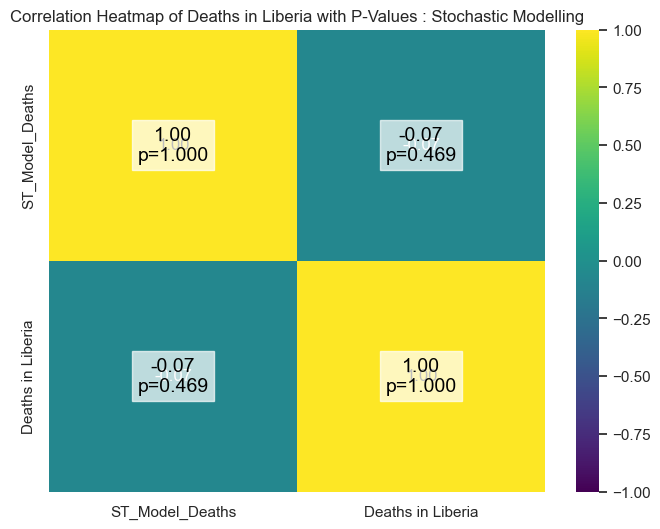

In [140]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
# Calculate the correlation matrix and p-values
correlation_matrix = df_LE[['ST_Model_Deaths', 'Deaths in Liberia']].corr()
p_values = df_LE[['ST_Model_Deaths', 'Deaths in Liberia']].corr(method=lambda x, y: pearsonr(x, y)[1])

# Plot the heatmap
plt.figure(figsize=(8, 6))
ax = sns.heatmap(correlation_matrix, annot=True, cmap="viridis", vmin=-1, vmax=1, fmt=".2f")

# Add p-values as text annotations within heatmap cells
for i in range(correlation_matrix.shape[0]):
    for j in range(correlation_matrix.shape[1]):
        p_val = f"p={p_values.iloc[i, j]:.3f}"
        ax.text(j + 0.5, i + 0.5, f"{correlation_matrix.iloc[i, j]:.2f}\n{p_val}", 
                ha='center', va='center', color='black', fontsize=14, bbox=dict(facecolor='white', alpha=0.7))

# Customize the plot
plt.title("Correlation Heatmap of Deaths in Liberia with P-Values : Stochastic Modelling")
plt.show()

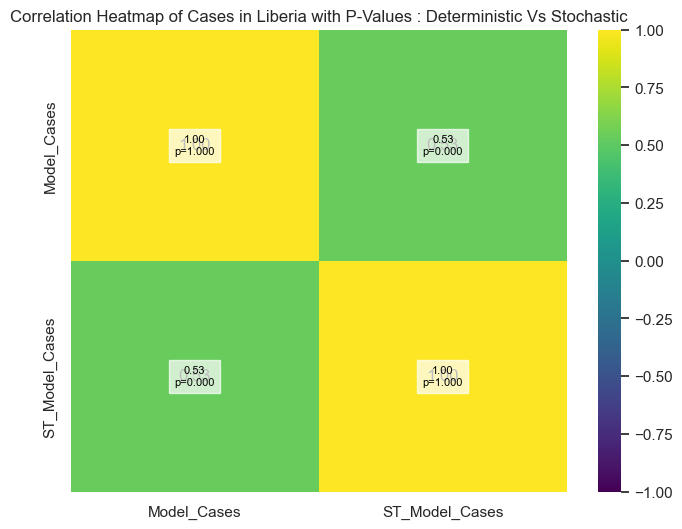

In [141]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
# Calculate the correlation matrix and p-values
correlation_matrix = df_LE[['Model_Cases', 'ST_Model_Cases']].corr()
p_values = df_LE[['Model_Cases','ST_Model_Cases']].corr(method=lambda x, y: pearsonr(x, y)[1])

# Plot the heatmap
plt.figure(figsize=(8, 6))
ax = sns.heatmap(correlation_matrix, annot=True, cmap="viridis", vmin=-1, vmax=1, fmt=".2f")

# Add p-values as text annotations within heatmap cells
for i in range(correlation_matrix.shape[0]):
    for j in range(correlation_matrix.shape[1]):
        p_val = f"p={p_values.iloc[i, j]:.3f}"
        ax.text(j + 0.5, i + 0.5, f"{correlation_matrix.iloc[i, j]:.2f}\n{p_val}", 
                ha='center', va='center', color='black', fontsize=8, bbox=dict(facecolor='white', alpha=0.7))

# Customize the plot
plt.title("Correlation Heatmap of Cases in Liberia with P-Values : Deterministic Vs Stochastic")
plt.show()

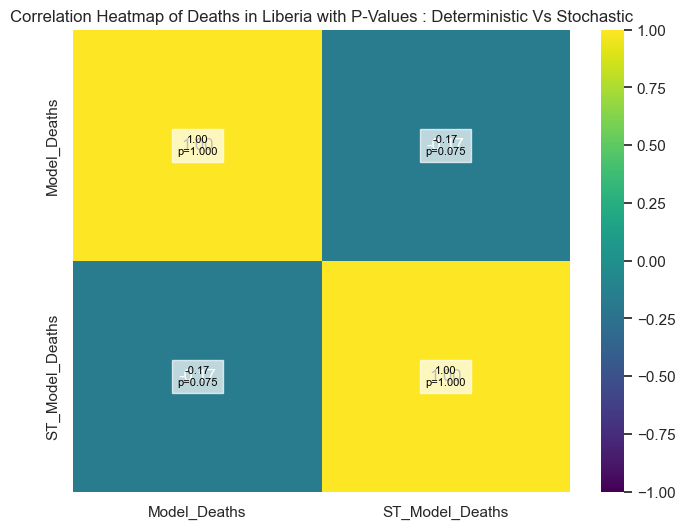

In [142]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
# Calculate the correlation matrix and p-values
correlation_matrix = df_LE[['Model_Deaths', 'ST_Model_Deaths']].corr()
p_values = df_LE[['Model_Deaths','ST_Model_Deaths']].corr(method=lambda x, y: pearsonr(x, y)[1])

# Plot the heatmap
plt.figure(figsize=(8, 6))
ax = sns.heatmap(correlation_matrix, annot=True, cmap="viridis", vmin=-1, vmax=1, fmt=".2f")

# Add p-values as text annotations within heatmap cells
for i in range(correlation_matrix.shape[0]):
    for j in range(correlation_matrix.shape[1]):
        p_val = f"p={p_values.iloc[i, j]:.3f}"
        ax.text(j + 0.5, i + 0.5, f"{correlation_matrix.iloc[i, j]:.2f}\n{p_val}", 
                ha='center', va='center', color='black', fontsize=8, bbox=dict(facecolor='white', alpha=0.7))

# Customize the plot
plt.title("Correlation Heatmap of Deaths in Liberia with P-Values : Deterministic Vs Stochastic")
plt.show()

In [143]:
from scipy.stats import ttest_rel
# Perform paired samples t-test
t_statistic, p_value = ttest_rel(df_LE['Cases in Liberia'],df_LE['Model_Cases'])

# Output the results
print(f"t-statistic: {t_statistic}, p-value: {p_value}")

t-statistic: -12.718204998732556, p-value: 3.940383994676738e-23


In [150]:
from scipy.stats import ttest_rel
# Perform paired samples t-test
t_statistic, p_value = ttest_rel(df_LE['Cases in Liberia'],df_LE['ST_Model_Cases'])

# Output the results
print(f"t-statistic: {t_statistic}, p-value: {p_value}")

t-statistic: 0.0837878191623457, p-value: 0.9333816907795291


In [152]:
from scipy.stats import ttest_rel
# Perform paired samples t-test
t_statistic, p_value = ttest_rel(df_LE['Deaths in Liberia'],df_LE['Model_Deaths'])

# Output the results
print(f"t-statistic: {t_statistic}, p-value: {p_value}")

t-statistic: -5.9591948991491135, p-value: 3.293576168767186e-08


In [154]:
from scipy.stats import ttest_rel
# Perform paired samples t-test
t_statistic, p_value = ttest_rel(df_LE['Deaths in Liberia'],df_LE['ST_Model_Deaths'])

# Output the results
print(f"t-statistic: {t_statistic}, p-value: {p_value}")

t-statistic: 5.8741544845561435, p-value: 4.860822951010732e-08


In [157]:
from scipy.stats import ttest_rel
# Perform paired samples t-test
t_statistic, p_value = ttest_rel(df_LE['Model_Deaths'],df_LE['ST_Model_Deaths'])

# Output the results
print(f"t-statistic: {t_statistic}, p-value: {p_value}")

t-statistic: 13.820038539070197, p-value: 1.522629859637733e-25


In [156]:
from scipy.stats import ttest_rel
# Perform paired samples t-test
t_statistic, p_value = ttest_rel(df_LE['Model_Cases'],df_LE['ST_Model_Cases'])

# Output the results
print(f"t-statistic: {t_statistic}, p-value: {p_value}")

t-statistic: 12.64626428597345, p-value: 5.685745902166969e-23
